In [182]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [183]:
df = pd.read_csv(r'D:\5.MBAN6110 Data Science I\purchases.csv')

Data cleaning

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9747 entries, 0 to 9746
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     9747 non-null   int64  
 1   complaints                9747 non-null   int64  
 2   transactions_ytd          9747 non-null   int64  
 3   avg_tr_amt                9746 non-null   float64
 4   time_on_site              9743 non-null   float64
 5   total_discounts           9744 non-null   float64
 6   num_reviews               9747 non-null   int64  
 7   avg_review                9747 non-null   float64
 8   returns                   9746 non-null   float64
 9   latest_review             9747 non-null   int64  
 10  num_total_purchases       9747 non-null   int64  
 11  purchase_made_last_month  9747 non-null   object 
dtypes: float64(5), int64(6), object(1)
memory usage: 913.9+ KB


In [185]:
df.isnull().sum(axis=1).sum()

9

Only 9 null rows. drop them then 99.9% left.

In [186]:
df = df.dropna()


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9738 entries, 0 to 9746
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     9738 non-null   int64  
 1   complaints                9738 non-null   int64  
 2   transactions_ytd          9738 non-null   int64  
 3   avg_tr_amt                9738 non-null   float64
 4   time_on_site              9738 non-null   float64
 5   total_discounts           9738 non-null   float64
 6   num_reviews               9738 non-null   int64  
 7   avg_review                9738 non-null   float64
 8   returns                   9738 non-null   float64
 9   latest_review             9738 non-null   int64  
 10  num_total_purchases       9738 non-null   int64  
 11  purchase_made_last_month  9738 non-null   object 
dtypes: float64(5), int64(6), object(1)
memory usage: 989.0+ KB


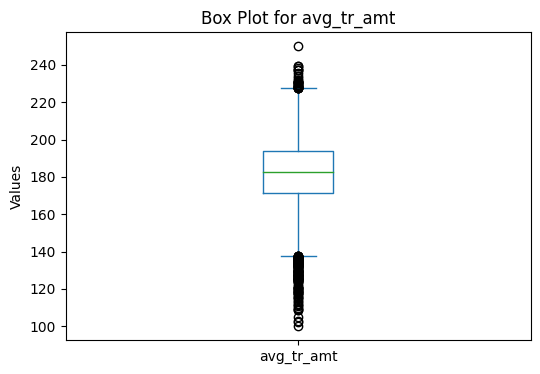

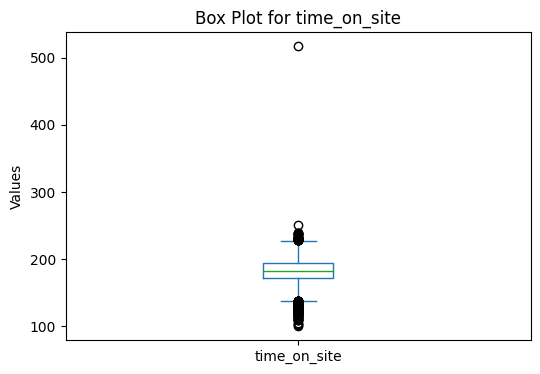

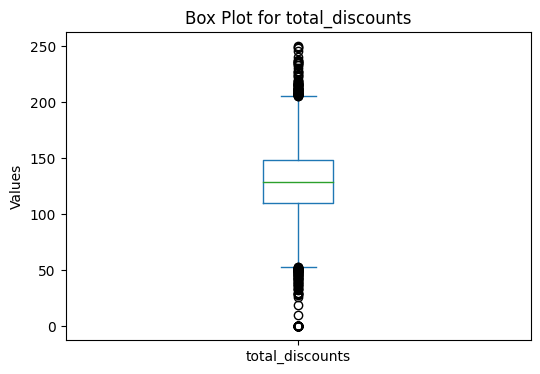

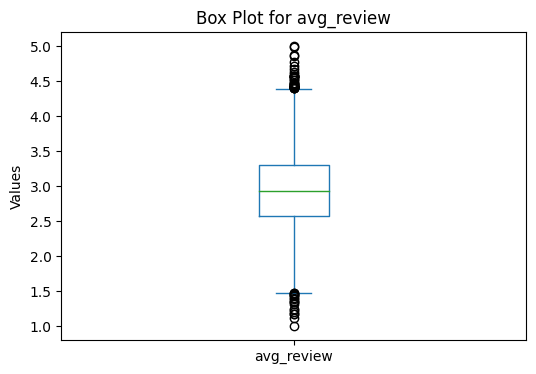

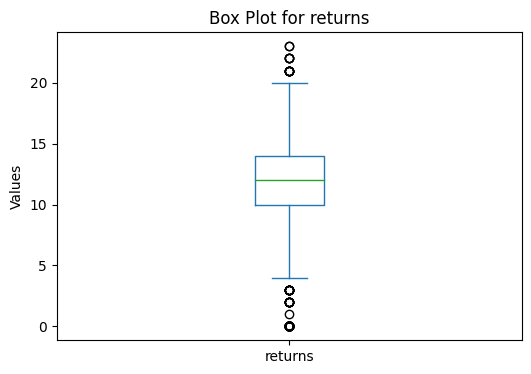

In [188]:
import matplotlib.pyplot as plt

# Iterate over columns
for column in df.columns:
    # Skip non-numeric columns
    if not df[column].dtype in [float, int]:
        continue
    
    # Create a box plot
    plt.figure(figsize=(6, 4))
    df[column].plot.box()
    
    # Set the title and labels
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    
    # Show the plot
    plt.show()

Remove outliers

96.7% data left

In [189]:
df = df[(df['avg_tr_amt'] >= 130) & (df['avg_tr_amt'] <= 230)]
df = df[(df['time_on_site'] >=120) & (df['time_on_site'] <= 250)] 
df = df[(df['total_discounts'] >=50) & (df['total_discounts'] <= 230)] 
df = df[(df['avg_review'] >=1.5) & (df['avg_review'] <= 4.6)] 
df = df[(df['returns'] >=4) & (df['returns'] <= 20)] 

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9422 entries, 1 to 9746
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     9422 non-null   int64  
 1   complaints                9422 non-null   int64  
 2   transactions_ytd          9422 non-null   int64  
 3   avg_tr_amt                9422 non-null   float64
 4   time_on_site              9422 non-null   float64
 5   total_discounts           9422 non-null   float64
 6   num_reviews               9422 non-null   int64  
 7   avg_review                9422 non-null   float64
 8   returns                   9422 non-null   float64
 9   latest_review             9422 non-null   int64  
 10  num_total_purchases       9422 non-null   int64  
 11  purchase_made_last_month  9422 non-null   object 
dtypes: float64(5), int64(6), object(1)
memory usage: 956.9+ KB


In [191]:
df.head(10)

,index,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases,purchase_made_last_month
1,1,7,15,160.80,160.80,125.75,6,1.92,12.0,3,44,Yes
2,2,4,11,165.13,165.13,124.16,7,2.27,16.0,2,30,Yes
3,3,4,12,184.29,184.29,164.87,7,3.33,7.0,3,31,No
5,5,6,8,183.71,183.71,108.52,9,3.58,8.0,4,32,No
6,6,4,13,204.67,204.67,135.98,7,3.39,12.0,2,47,Yes
7,7,11,16,179.68,179.68,191.21,9,3.35,7.0,4,34,No
8,8,9,14,191.11,191.11,166.92,10,3.33,13.0,3,36,No
9,9,7,13,177.42,177.42,116.18,6,2.90,12.0,3,36,No
10,10,6,12,181.52,181.52,173.90,7,3.00,11.0,3,28,No
12,12,6,13,154.25,154.25,91.61,6,2.28,11.0,2,41,Yes


review scale from 1 to 5.  avg 2.9

In [192]:
df.describe()

,index,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases
count,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000
mean,4922.611866,6.748992,13.395139,182.272017,182.272017,130.045056,8.561346,2.949376,11.824560,3.252494,37.010613
std,2798.765689,1.857787,2.846680,16.756382,16.756382,28.478255,1.823028,0.517425,2.706712,0.598650,5.086962
min,1.000000,1.000000,2.000000,130.230000,130.230000,50.050000,1.000000,1.510000,4.000000,1.000000,16.000000
25%,2527.250000,5.000000,12.000000,171.665000,171.665000,111.252500,7.000000,2.580000,10.000000,3.000000,33.000000
50%,4937.500000,6.000000,14.000000,182.800000,182.800000,129.450000,9.000000,2.930000,12.000000,3.000000,37.000000
75%,7344.750000,8.000000,15.000000,193.790000,193.790000,148.527500,10.000000,3.300000,14.000000,4.000000,41.000000
max,9746.000000,14.000000,24.000000,229.220000,229.220000,227.750000,15.000000,4.580000,20.000000,5.000000,55.000000


In [193]:
df.groupby('purchase_made_last_month')[['complaints','transactions_ytd','avg_tr_amt',
'time_on_site','total_discounts','num_reviews','avg_review','returns','latest_review','num_total_purchases']].median()

,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases
purchase_made_last_month,,,,,,,,,,
No,8.0,13.0,179.58,179.58,130.59,8.0,2.95,12.0,3.0,34.0
Yes,6.0,14.0,186.31,186.31,128.71,9.0,2.91,12.0,3.0,40.0


Replace purchase_made_laet_month with 0 / 1. Use 0 = No. 1 = Yes

In [194]:
df['purchase_made_last_month'] = df['purchase_made_last_month'].apply(lambda x: 1 if x == 'Yes' else 0)


 Do A/B testing for each feature. See how they relvent with purchase_made_last_month.   
Overall When I comparing complaints, transactions_ytd, avg_tr_amt, time_on_sit, total_discounts, 
num_reviews, returns, last_review, num_total_purchases, 
I see there are significant differences between variant and the control.
There P-value are all lower than 0.05.

In [195]:
# Compare complaints
from scipy import stats
var1 = df[df['purchase_made_last_month']== 0]['complaints']
control = df[df['purchase_made_last_month']== 1]['complaints']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=60.14159718461286, pvalue=0.0)


In [196]:
#Compare transactions_ytd
var1 = df[df['purchase_made_last_month']== 0]['transactions_ytd']
control = df[df['purchase_made_last_month']== 1]['transactions_ytd']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-28.65170950750674, pvalue=3.511479340164243e-173)


In [197]:
# Compare avg_tr_amt
var1 = df[df['purchase_made_last_month']== 0]['avg_tr_amt']
control = df[df['purchase_made_last_month']== 1]['avg_tr_amt']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-21.75631135427981, pvalue=1.9463015609909535e-102)


In [198]:
#Compare time_on_sit
var1 = df[df['purchase_made_last_month']== 0]['time_on_site']
control = df[df['purchase_made_last_month']== 1]['time_on_site']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-21.75631135427981, pvalue=1.9463015609909535e-102)


In [199]:
#Compare total_discounts
var1 = df[df['purchase_made_last_month']== 0]['total_discounts']
control = df[df['purchase_made_last_month']== 1]['total_discounts']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=2.7301613446125392, pvalue=0.006342101077492432)


In [200]:
#Compare num_reviews
var1 = df[df['purchase_made_last_month']== 0]['num_reviews']
control = df[df['purchase_made_last_month']== 1]['num_reviews']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-26.420492617355144, pvalue=1.862709821710353e-148)


For avg_review, p-value is more than 0.6. It shows no significant correlated with purchase_made_last_month.  

In [202]:
#Compare avg_review
var1 = df[df['purchase_made_last_month']== 0]['avg_review']
control = df[df['purchase_made_last_month']== 1]['avg_review']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=0.5188753339611876, pvalue=0.6038598684316403)


In [203]:
#Compare returns
var1 = df[df['purchase_made_last_month']== 0]['returns']
control = df[df['purchase_made_last_month']== 1]['returns']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=3.542676888882005, pvalue=0.0003980040264181246)


In [205]:
#Compare latest_review
var1 = df[df['purchase_made_last_month']== 0]['latest_review']
control = df[df['purchase_made_last_month']== 1]['latest_review']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=25.08395293385567, pvalue=1.8003864882540813e-134)


In [201]:
#Compare num_total_purchases
var1 = df[df['purchase_made_last_month']== 0]['num_total_purchases']
control = df[df['purchase_made_last_month']== 1]['num_total_purchases']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-63.23399596794843, pvalue=0.0)


In [206]:
correlation_matrix = df.corrwith(df['purchase_made_last_month'])
print(correlation_matrix)


index                       0.005570
complaints                 -0.526727
transactions_ytd            0.283127
avg_tr_amt                  0.218733
time_on_site                0.218733
total_discounts            -0.028118
num_reviews                 0.262659
avg_review                 -0.005346
returns                    -0.036477
latest_review              -0.250225
num_total_purchases         0.545881
purchase_made_last_month    1.000000
dtype: float64


Modelling. 

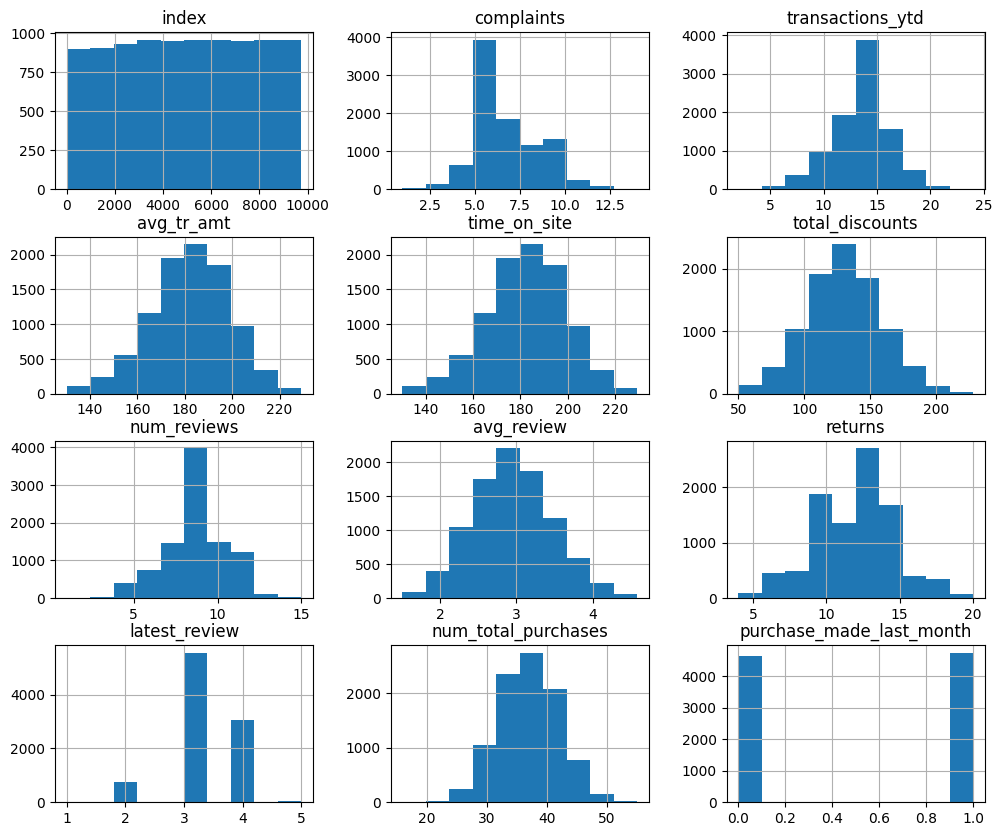

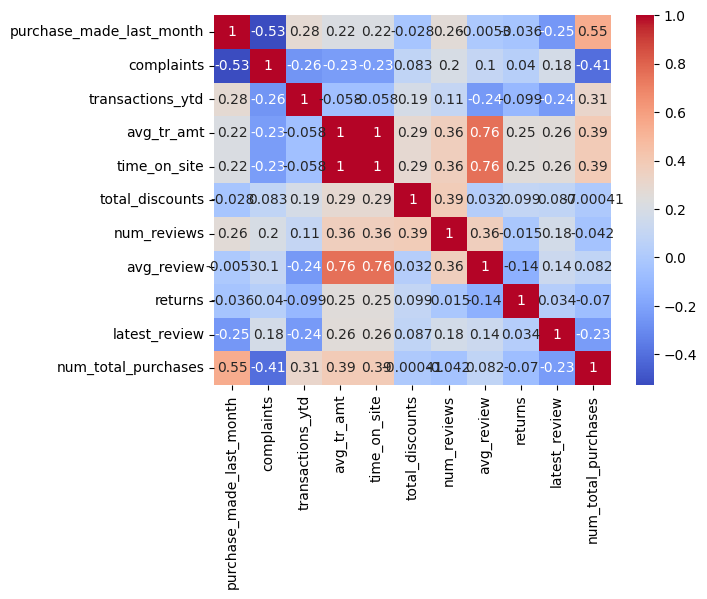

In [220]:
# Histograms
df.hist(figsize=(12, 10)) # we can quickly create all histograms at once 
plt.show()

# Correlation matrix heatmap
new_t = df[['purchase_made_last_month', 'complaints', 'transactions_ytd', 'avg_tr_amt', 'time_on_site', 'total_discounts', 'num_reviews',
            'avg_review','returns','latest_review','num_total_purchases']]
corr_matrix = new_t.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

The coefficient of determination, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R-squared value of 0.606 suggests that about 60.6% of the variation in the dependent variable is explained by the independent variables in the model.

In [209]:
olsresults = ols("purchase_made_last_month ~ complaints + transactions_ytd + avg_tr_amt + time_on_site + total_discounts + num_reviews + returns + latest_review + num_total_purchases", data=df).fit()
print(olsresults.summary())

                               OLS Regression Results                               
Dep. Variable:     purchase_made_last_month   R-squared:                       0.606
Model:                                  OLS   Adj. R-squared:                  0.606
Method:                       Least Squares   F-statistic:                     1811.
Date:                      Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                              15:48:46   Log-Likelihood:                -2448.5
No. Observations:                      9422   AIC:                             4915.
Df Residuals:                          9413   BIC:                             4979.
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [216]:
df.describe()

,index,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases,purchase_made_last_month
count,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000
mean,4922.611866,6.748992,13.395139,182.272017,182.272017,130.045056,8.561346,2.949376,11.824560,3.252494,37.010613,0.505094
std,2798.765689,1.857787,2.846680,16.756382,16.756382,28.478255,1.823028,0.517425,2.706712,0.598650,5.086962,0.500001
min,1.000000,1.000000,2.000000,130.230000,130.230000,50.050000,1.000000,1.510000,4.000000,1.000000,16.000000,0.000000
25%,2527.250000,5.000000,12.000000,171.665000,171.665000,111.252500,7.000000,2.580000,10.000000,3.000000,33.000000,0.000000
50%,4937.500000,6.000000,14.000000,182.800000,182.800000,129.450000,9.000000,2.930000,12.000000,3.000000,37.000000,1.000000
75%,7344.750000,8.000000,15.000000,193.790000,193.790000,148.527500,10.000000,3.300000,14.000000,4.000000,41.000000,1.000000
max,9746.000000,14.000000,24.000000,229.220000,229.220000,227.750000,15.000000,4.580000,20.000000,5.000000,55.000000,1.000000


In [221]:
dummy_latestreview = pd.get_dummies(df.complaints, dtype=float)
dummy_latestreview = pd.get_dummies(pd.cut(df['latest_review'], bins=[1, 2, 3, 4, 5], labels=['low', 'ok', 'good', 'great']))\
    .rename(columns={'low': 'low', 'ok': 'ok', 'good': 'good', 'great': 'great'})\
    .astype(int)

In [222]:
dummy_latestreview

,low,ok,good,great
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
5,0,0,1,0
6,1,0,0,0
...,...,...,...,...
9742,0,1,0,0
9743,0,1,0,0
9744,0,1,0,0
9745,0,1,0,0


In [223]:
df2 = pd.concat([df,dummy_latestreview], axis=1)
df2

,index,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases,purchase_made_last_month,low,ok,good,great
1,1,7,15,160.80,160.80,125.75,6,1.92,12.0,3,44,1,0,1,0,0
2,2,4,11,165.13,165.13,124.16,7,2.27,16.0,2,30,1,1,0,0,0
3,3,4,12,184.29,184.29,164.87,7,3.33,7.0,3,31,0,0,1,0,0
5,5,6,8,183.71,183.71,108.52,9,3.58,8.0,4,32,0,0,0,1,0
6,6,4,13,204.67,204.67,135.98,7,3.39,12.0,2,47,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9742,9742,9,11,170.61,170.61,121.57,7,2.65,14.0,3,34,0,0,1,0,0
9743,9743,6,15,164.04,164.04,131.60,9,2.48,9.0,3,40,1,0,1,0,0
9744,9744,8,16,176.52,176.52,99.72,7,3.28,10.0,3,36,0,0,1,0,0
9745,9745,7,12,186.93,186.93,114.78,9,3.48,12.0,3,36,0,0,1,0,0


In [226]:
boolean_columns = ['low', 'ok', 'good', 'great']
df2[boolean_columns] = df2[boolean_columns].astype(bool)

In [227]:
df2.head()

,index,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases,purchase_made_last_month,low,ok,good,great
1,1,7,15,160.80,160.80,125.75,6,1.92,12.0,3,44,1,False,True,False,False
2,2,4,11,165.13,165.13,124.16,7,2.27,16.0,2,30,1,True,False,False,False
3,3,4,12,184.29,184.29,164.87,7,3.33,7.0,3,31,0,False,True,False,False
5,5,6,8,183.71,183.71,108.52,9,3.58,8.0,4,32,0,False,False,True,False
6,6,4,13,204.67,204.67,135.98,7,3.39,12.0,2,47,1,True,False,False,False


In [230]:
cat_columns = ['low','ok','good','great']
num_columns = ['complaints','transactions_ytd','avg_tr_amt','time_on_site','total_discounts','num_reviews','returns','num_total_purchases']
target = 'purchase_made_last_month'

In [232]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

In [234]:
# build pipeline
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [237]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df2[cat_columns + num_columns], df2[target], test_size=0.2, random_state=42)

In [239]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [241]:
x_train_transformed.shape

(7537, 16)

In [243]:
x_test_transformed.shape

(1885, 16)

In [245]:
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns))
all_feat = num_columns + encoded_columns

X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

In [253]:
accuracies = []

for a in range(1,100):
        
    knn = KNeighborsClassifier(n_neighbors = a)
    knn.fit(X_train_transformed, y_train)
    y_pred = knn.predict(X_test_transformed)
    accuracies.append(accuracy_score(y_pred, y_test))

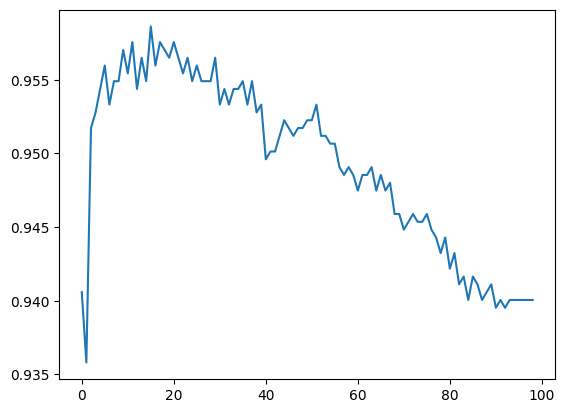

In [247]:
plt.plot(accuracies)

In [248]:
# Hyperparameter tuning
# select parameters
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
params_knn = {'n_neighbors': list(range(1,100)), 'weights': ['uniform', 'distance']}

# Define the models
nb = GaussianNB()
knn = KNeighborsClassifier()

# Define GridSearchCV
gridsearch_nb = GridSearchCV(nb, params_nb, cv=5, scoring='roc_auc')
    #nb, params_nb, cv=5)
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, scoring='roc_auc')

# Fit models
gridsearch_nb.fit(X_train_transformed, y_train)
randomsearch_knn.fit(X_train_transformed, y_train)

# Get the best parameters
print("Best parameters for Naive Bayes: ", gridsearch_nb.best_params_)
print("Best parameters for KNN: ", randomsearch_knn.best_params_)

Best parameters for Naive Bayes:  {'var_smoothing': 0.1873817422860384}
Best parameters for KNN:  {'weights': 'uniform', 'n_neighbors': 33}


In [250]:
# Apply the best parameters
nb_best = GaussianNB(**gridsearch_nb.best_params_)
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)

# Perform cross-validation
cv_scores_nb = cross_val_score(nb_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
cv_scores_knn = cross_val_score(knn_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')

print("Cross-validation scores for Naive Bayes: ", cv_scores_nb)
print("Cross-validation scores for KNN: ", cv_scores_knn)

# Fit the models with the best parameters
nb_best.fit(X_train_transformed, y_train)
knn_best.fit(X_train_transformed, y_train)

# Evaluate on the test set
y_pred_nb = nb_best.predict(X_test_transformed)
y_pred_knn = knn_best.predict(X_test_transformed)

print("Test accuracy for Naive Bayes: ", accuracy_score(y_test, y_pred_nb))
print("Test accuracy for KNN: ", accuracy_score(y_test, y_pred_knn))

Cross-validation scores for Naive Bayes:  [0.92916104 0.92170699 0.92538649 0.92946206 0.91276698]
Cross-validation scores for KNN:  [0.98869402 0.98552908 0.99080455 0.99281514 0.98967589]
Test accuracy for Naive Bayes:  0.8318302387267904
Test accuracy for KNN:  0.956498673740053


In [252]:
# Compute metrics
print("Naive Bayes Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_nb))
print("Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Precision: ", precision_score(y_test, y_pred_nb))
print("Recall: ", recall_score(y_test, y_pred_nb))
print("F1 Score: ", f1_score(y_test, y_pred_nb))

print("\nK-Nearest Neighbors Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))

Naive Bayes Metrics: 
Confusion Matrix:  [[790 155]
 [162 778]]
Accuracy:  0.8318302387267904
Precision:  0.8338692390139335
Recall:  0.8276595744680851
F1 Score:  0.8307528029898558

K-Nearest Neighbors Metrics: 
Confusion Matrix:  [[888  57]
 [ 25 915]]
Accuracy:  0.956498673740053
Precision:  0.941358024691358
Recall:  0.973404255319149
F1 Score:  0.9571129707112971
